In [1]:
import numpy as np
import csv
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

Import data and finish cleaning. Most done in excel due to being faster and some large inconsistencies on the website

In [2]:
df = pd.read_csv('CarData.csv')

In [3]:
df.head

<bound method NDFrame.head of              Make       Model   Price  Reg year Vehicle type  Miles  \
0              AC       Cobra   76995      1999  Convertible  12500   
1              AC       Cobra  109750      2001  Convertible  14000   
2              AC       Cobra  120000      2000  Convertible   2993   
3          Abarth  124 Spider   21440      2018  Convertible  11049   
4          Abarth  124 Spider   17980      2017  Convertible  38625   
...           ...         ...     ...       ...          ...    ...   
220733      Volvo        XC90   39995      2016          SUV  46934   
220734      Volvo        XC90   41990      2019          SUV  24322   
220735  Westfield        2000   16995      1997  Convertible  17960   
220736  Westfield        2000    8495      1996  Convertible  14500   
220737  Westfield        2000   15000      2015  Convertible   2900   

        Engine size  Horsepower Trans type Fuel type  
0               4.9         225     Manual    Petrol  
1      

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220738 entries, 0 to 220737
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Make          220738 non-null  object 
 1   Model         220738 non-null  object 
 2   Price         220738 non-null  int64  
 3   Reg year      220738 non-null  int64  
 4   Vehicle type  220738 non-null  object 
 5   Miles         220738 non-null  int64  
 6   Engine size   220738 non-null  float64
 7   Horsepower    220738 non-null  int64  
 8   Trans type    220738 non-null  object 
 9   Fuel type     220738 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 16.8+ MB


In [5]:
df = df.replace([np.inf, -np.inf], np.nan)

df[['Price', 'Reg year', 'Miles', 'Engine size', 'Horsepower']] = df[['Price', 'Reg year', 'Miles', 'Engine size', 'Horsepower']].apply(pd.to_numeric, errors='coerce')

df = df.astype({'Make':str, 'Model':str, 'Vehicle type':str, 'Trans type':str, 'Fuel type':str})

In [6]:
df = df.drop_duplicates()
df = df.dropna()

df.head

<bound method NDFrame.head of              Make       Model   Price  Reg year Vehicle type  Miles  \
0              AC       Cobra   76995      1999  Convertible  12500   
1              AC       Cobra  109750      2001  Convertible  14000   
2              AC       Cobra  120000      2000  Convertible   2993   
3          Abarth  124 Spider   21440      2018  Convertible  11049   
4          Abarth  124 Spider   17980      2017  Convertible  38625   
...           ...         ...     ...       ...          ...    ...   
220733      Volvo        XC90   39995      2016          SUV  46934   
220734      Volvo        XC90   41990      2019          SUV  24322   
220735  Westfield        2000   16995      1997  Convertible  17960   
220736  Westfield        2000    8495      1996  Convertible  14500   
220737  Westfield        2000   15000      2015  Convertible   2900   

        Engine size  Horsepower Trans type Fuel type  
0               4.9         225     Manual    Petrol  
1      

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220733 entries, 0 to 220737
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Make          220733 non-null  object 
 1   Model         220733 non-null  object 
 2   Price         220733 non-null  int64  
 3   Reg year      220733 non-null  int64  
 4   Vehicle type  220733 non-null  object 
 5   Miles         220733 non-null  int64  
 6   Engine size   220733 non-null  float64
 7   Horsepower    220733 non-null  int64  
 8   Trans type    220733 non-null  object 
 9   Fuel type     220733 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 18.5+ MB


In [8]:
df = df.reset_index(drop=True)

df.head

<bound method NDFrame.head of              Make       Model   Price  Reg year Vehicle type  Miles  \
0              AC       Cobra   76995      1999  Convertible  12500   
1              AC       Cobra  109750      2001  Convertible  14000   
2              AC       Cobra  120000      2000  Convertible   2993   
3          Abarth  124 Spider   21440      2018  Convertible  11049   
4          Abarth  124 Spider   17980      2017  Convertible  38625   
...           ...         ...     ...       ...          ...    ...   
220728      Volvo        XC90   39995      2016          SUV  46934   
220729      Volvo        XC90   41990      2019          SUV  24322   
220730  Westfield        2000   16995      1997  Convertible  17960   
220731  Westfield        2000    8495      1996  Convertible  14500   
220732  Westfield        2000   15000      2015  Convertible   2900   

        Engine size  Horsepower Trans type Fuel type  
0               4.9         225     Manual    Petrol  
1      

A known error from when i was doing my disertation is that converting the models to string corrected some volvo models into dates. Quickly fixing this before continuing

In [9]:
df.Model = df.Model.replace({"04-Apr": "4/4","09-Mar":"9-3","09-May":"9-5"})

Last check for null values before encoding

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220733 entries, 0 to 220732
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Make          220733 non-null  object 
 1   Model         220733 non-null  object 
 2   Price         220733 non-null  int64  
 3   Reg year      220733 non-null  int64  
 4   Vehicle type  220733 non-null  object 
 5   Miles         220733 non-null  int64  
 6   Engine size   220733 non-null  float64
 7   Horsepower    220733 non-null  int64  
 8   Trans type    220733 non-null  object 
 9   Fuel type     220733 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 16.8+ MB


Standardising data to help with model training

In [11]:
df.describe()

,Price,Reg year,Miles,Engine size,Horsepower
count,2.207330e+05,220733.000000,2.207330e+05,220733.000000,220733.000000
mean,1.995900e+04,2015.019902,4.967118e+04,1.945273,172.766496
std,2.451618e+04,4.751485,3.921319e+04,0.899134,112.450120
min,2.950000e+02,1901.000000,1.000000e+00,0.000000,0.000000
25%,7.995000e+03,2012.000000,1.977900e+04,1.400000,111.000000
50%,1.495000e+04,2016.000000,4.095000e+04,1.900000,146.000000
75%,2.380000e+04,2018.000000,7.291900e+04,2.100000,195.000000
max,2.340000e+06,2022.000000,5.000000e+06,8.300000,19000.000000


<Axes: ylabel='Frequency'>

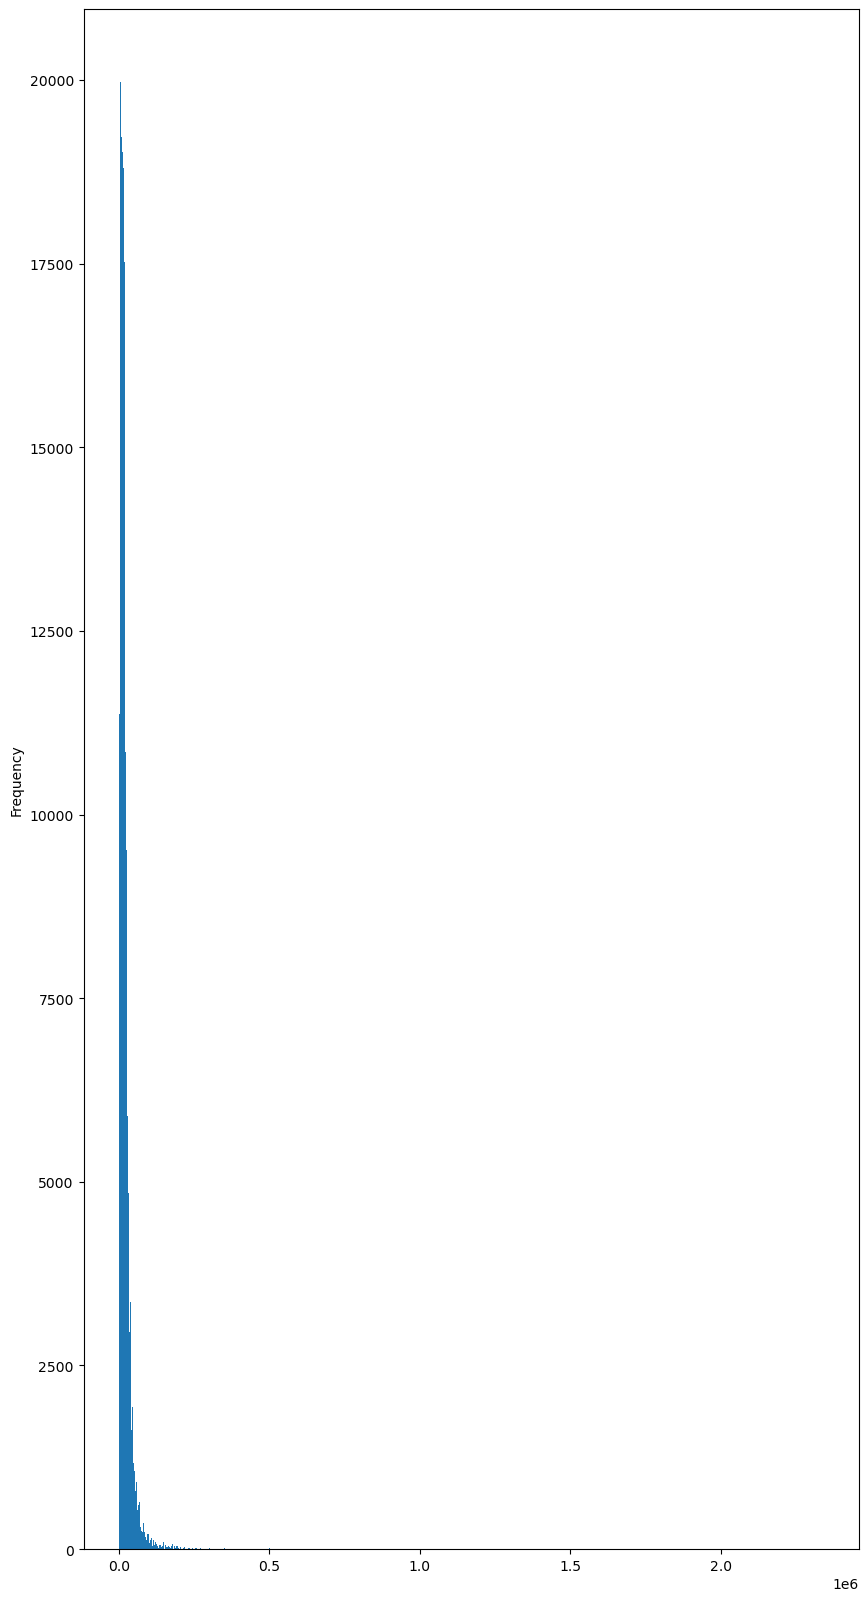

In [12]:
df['Price'].plot(kind='hist', bins=1000, figsize=(10,20))

Seems like there are a few extremely high price cars in the data. we will delete these as well as the ones that are listed for less that 400 GBP as they likely dont work. we will limit upper price to 100,000 GBP

In [13]:
df = df.loc[df['Price'] < 100000]

In [14]:
df = df.loc[df['Price'] > 400]

In [15]:
df.describe()

,Price,Reg year,Miles,Engine size,Horsepower
count,218142.000000,218142.000000,2.181420e+05,218142.000000,218142.000000
mean,18171.993403,2014.982654,5.013592e+04,1.917305,168.376837
std,14995.216023,4.742928,3.919199e+04,0.849319,103.795857
min,450.000000,1901.000000,1.000000e+00,0.000000,0.000000
25%,7990.000000,2012.000000,2.015900e+04,1.400000,111.000000
50%,14700.000000,2016.000000,4.140000e+04,1.800000,143.000000
75%,23250.000000,2018.000000,7.304525e+04,2.100000,192.000000
max,99999.000000,2022.000000,5.000000e+06,8.300000,19000.000000


<Axes: ylabel='Frequency'>

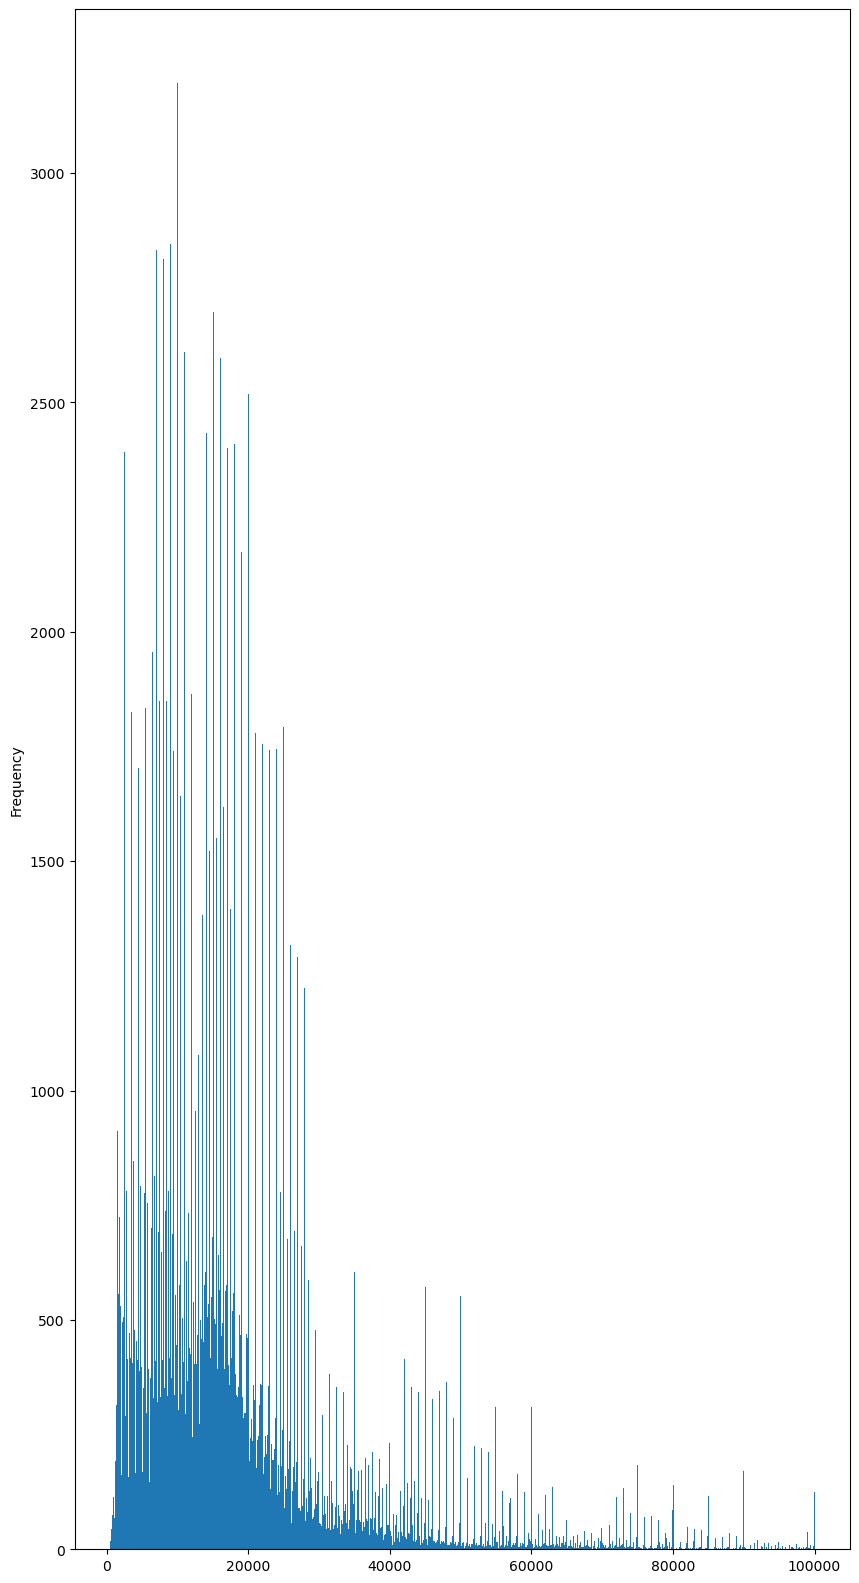

In [16]:
df['Price'].plot(kind='hist', bins=1000, figsize=(10,20))

We will also remove any cars with over 1000 horsepower as it is unlikley that this is filled in properly

In [17]:
df = df.loc[df['Horsepower'] < 1000]

In [18]:
df.describe()

,Price,Reg year,Miles,Engine size,Horsepower
count,218139.000000,218139.000000,2.181390e+05,218139.000000,218139.000000
mean,18171.910988,2014.982617,5.013555e+04,1.917296,168.271006
std,14995.219673,4.742945,3.919140e+04,0.849321,95.427623
min,450.000000,1901.000000,1.000000e+00,0.000000,0.000000
25%,7990.000000,2012.000000,2.015900e+04,1.400000,111.000000
50%,14700.000000,2016.000000,4.140000e+04,1.800000,143.000000
75%,23250.000000,2018.000000,7.304450e+04,2.100000,192.000000
max,99999.000000,2022.000000,5.000000e+06,8.300000,999.000000


We will also remove any models that appear less than 10 times as the prediction accuracy with so few datapoints may be affected

In [19]:
v = df.Model.value_counts()
df = df[df.Model.isin(v.index[v.gt(10)])]

In [20]:
df.Model.value_counts()

Model
500               1073
C Class           1009
Hatch             1008
Leon              1008
Fiesta            1002
                  ... 
4C                  11
12C                 11
Colt Cabriolet      11
TX                  11
A2                  11
Name: count, Length: 659, dtype: int64

In [21]:
df.head

<bound method NDFrame.head of           Make       Model  Price  Reg year Vehicle type  Miles  Engine size  \
3       Abarth  124 Spider  21440      2018  Convertible  11049          1.4   
4       Abarth  124 Spider  17980      2017  Convertible  38625          1.4   
5       Abarth  124 Spider  17550      2018  Convertible  47831          1.4   
6       Abarth  124 Spider  20750      2018  Convertible  26713          1.4   
7       Abarth  124 Spider  21489      2017  Convertible  10360          1.4   
...        ...         ...    ...       ...          ...    ...          ...   
220725   Volvo        XC90  39995      2018          SUV  20531          2.0   
220726   Volvo        XC90  64350      2021          SUV   4181          2.0   
220727   Volvo        XC90  49599      2020          SUV  15184          2.0   
220728   Volvo        XC90  39995      2016          SUV  46934          2.0   
220729   Volvo        XC90  41990      2019          SUV  24322          2.0   

        H

In [22]:
df.reset_index(drop = True, inplace = True)

In [23]:
df.head

<bound method NDFrame.head of           Make       Model  Price  Reg year Vehicle type  Miles  Engine size  \
0       Abarth  124 Spider  21440      2018  Convertible  11049          1.4   
1       Abarth  124 Spider  17980      2017  Convertible  38625          1.4   
2       Abarth  124 Spider  17550      2018  Convertible  47831          1.4   
3       Abarth  124 Spider  20750      2018  Convertible  26713          1.4   
4       Abarth  124 Spider  21489      2017  Convertible  10360          1.4   
...        ...         ...    ...       ...          ...    ...          ...   
217020   Volvo        XC90  39995      2018          SUV  20531          2.0   
217021   Volvo        XC90  64350      2021          SUV   4181          2.0   
217022   Volvo        XC90  49599      2020          SUV  15184          2.0   
217023   Volvo        XC90  39995      2016          SUV  46934          2.0   
217024   Volvo        XC90  41990      2019          SUV  24322          2.0   

        H

Creating data base to help impletment some features of final app

In [24]:
df.to_csv('Database.csv', index = False)

In [25]:
make = LabelEncoder()
model = LabelEncoder()
vec_type = LabelEncoder()
tran_type = LabelEncoder()
fuel_type = LabelEncoder()
df['Make'] = make.fit_transform(df['Make'])
df['Model'] = model.fit_transform(df['Model'])
df['Vehicle type'] = vec_type.fit_transform(df['Vehicle type'])
df['Trans type'] = tran_type.fit_transform(df['Trans type'])
df['Fuel type'] = fuel_type.fit_transform (df['Fuel type'])

X = df.drop(columns='Price').values
y = df['Price'].values

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [26]:
rf = RandomForestRegressor()

In [27]:
rf.fit(x_train, y_train)

RandomForestRegressor()

In [28]:
pred = rf.predict(x_test)

In [29]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
mape = mean_absolute_percentage_error(y_test, pred)

print('R2 score: ' + str(r2))
print('MAE score: ' + str(mae))
print('MSE score: ' + str(mse))
print('MAPE score: ' + str(mape))

R2 score: 0.9661221301450197
MAE score: 1509.3442162072724
MSE score: 7465664.454427244
MAPE score: 0.11005600836274984


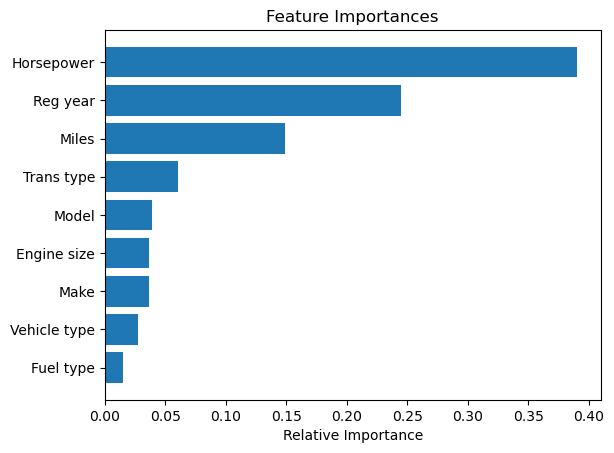

In [30]:
importances = rf.feature_importances_
indices = np.argsort(importances)

features = df.drop(columns=['Price']).columns

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [31]:
joblib.dump(rf, 'RF_Model.joblib')

['RF_Model.joblib']

In [32]:
joblib.dump(make, 'make_classes.joblib')
joblib.dump(model, 'model_classes.joblib')
joblib.dump(vec_type, 'vec_type_classes.joblib')
joblib.dump(tran_type, 'tran_type_classes.joblib')
joblib.dump(fuel_type, 'fuel_type_classes.joblib')

['fuel_type_classes.joblib']